In [1]:
%matplotlib inline
# import dependencies 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in CSV files
povertyCSV = (os.path.join('Resources', 'povertyRateWithCentroids.csv'))
crudeRateCSV = (os.path.join('Output','stateCrudeRates.csv'))
cancerCSV = (os.path.join('Resources', 'CDC_Cancer_by_County.csv'))
povertyCountyCSV = (os.path.join('Resources', 'Poverty%ByUSCounty.csv'))

# Create dataframes from CSVs
povertyDF = pd.read_csv(povertyCSV)
# remove index column that imported with CSV
del povertyDF['Unnamed: 0']

# Create crude rate DF with just 2015 column
crudeRateDF = pd.read_csv(crudeRateCSV, header=None)
crudeRateDF.columns = ['State', '2015 Crude Rate']

# Create Cancer DataFrame and pull out just 2015 values
cancerDF = pd.read_csv(cancerCSV)
cancerDF = cancerDF[cancerDF['Year']==2015.0]
cancerDF = pd.DataFrame(cancerDF, columns = ['County', 'Crude Rate'])
cancerDF = cancerDF[cancerDF['Crude Rate'] != 'Unreliable']
cancerDF = cancerDF[cancerDF['Crude Rate'] != 'Missing']

# pull in Poverty by Count
povertyCountyDF = pd.read_csv(povertyCountyCSV)
povertyCountyDF = pd.DataFrame(povertyCountyDF, columns = ['County', '2015'])

# preview DataFrames
#povertyDF
#crudeRateDF
#cancerDF.head()
#povertyCountyDF

In [3]:
crudeRateDF = crudeRateDF.sort_values(by='2015 Crude Rate')
crudeRateDF = crudeRateDF.set_index('State')
crudeRateDF['2015 Crude Rate'] = crudeRateDF['2015 Crude Rate']/4
#crudeRateDF['State'] = crudeRateDF['State'].replace('District of Columbia', 'Washington D.C.')
crudeRateDF.head()

,2015 Crude Rate
State,
District of Columbia,1.859000
Alaska,3.552070
Utah,4.314760
Wyoming,7.206063
Colorado,8.577141


In [4]:
pov2015df = povertyDF[['State', '2015']]
#pov2015df
pov2015df = pov2015df.rename(columns = {'2015': '2015 Poverty Rate'})
pov2015df = pov2015df.set_index('State')
pov2015df = pov2015df.sort_values(by='2015 Poverty Rate')
pov2015df.head()

,2015 Poverty Rate
State,
Connecticut,9.45
Maryland,9.85
Rhode Island,9.90
North Dakota,10.00
New Hampshire,10.10


In [5]:
deathPovertyRateDF = pd.merge(pov2015df, crudeRateDF, on='State', how='inner')
deathPovertyRateDF = deathPovertyRateDF.sort_values(by='2015 Crude Rate')
deathPovertyRateDF.head()

,2015 Poverty Rate,2015 Crude Rate
State,,
Alaska,11.10,3.552070
Utah,13.00,4.314760
Wyoming,10.70,7.206063
Colorado,13.75,8.577141
New Mexico,21.00,9.850672


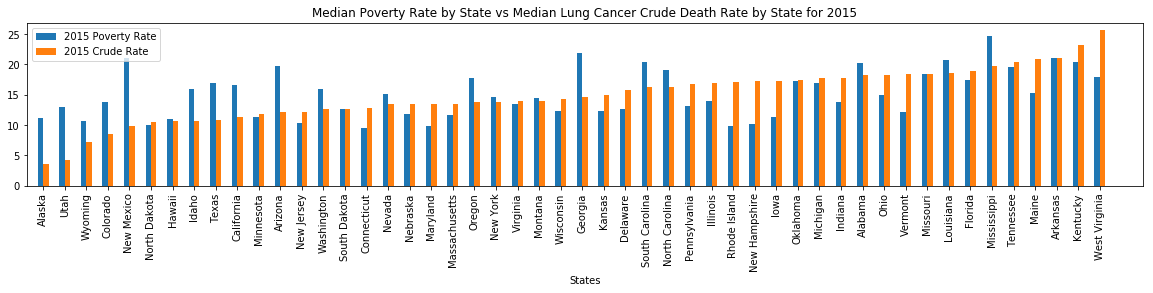

<Figure size 432x288 with 0 Axes>

In [6]:
x_axis = np.arange(len(pov2015df))
tickLocations = [value for value in x_axis]

#plot
deathPovertyRateDF.plot(kind='bar', figsize=(20,3))
#crudeRateDF.plot(kind='bar', figsize=(20,3))

#set x and y limits
plt.xlim(-0.75, len(x_axis))

plt.title("Median Poverty Rate by State vs Median Lung Cancer Crude Death Rate by State for 2015")
plt.xlabel("States")
plt.savefig(os.path.join("Output", "barChartPovertyvsCrudeRate.png"))
plt.show("% of Poverty Rate")
plt.tight_layout()

Text(0.5, 1.0, 'Median Poverty Rate by State vs Median Lung Cancer Crude Death Rate by State for 2015')

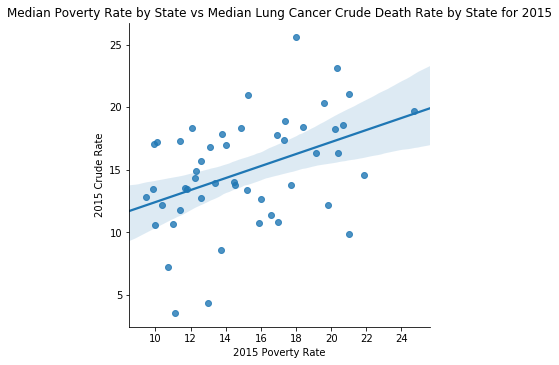

In [7]:
sns.lmplot(x='2015 Poverty Rate',y='2015 Crude Rate',data=deathPovertyRateDF, fit_reg=True)
plt.savefig(os.path.join("Output", "povRatevsCrudeRate-State-Scatter.png"))
plt.title('Median Poverty Rate by State vs Median Lung Cancer Crude Death Rate by State for 2015')

In [8]:
deathPovertyRateCountyDF = pd.merge(povertyCountyDF, cancerDF, how='inner')
deathPovertyRateCountyDF = deathPovertyRateCountyDF.rename(columns={'2015':'2015 Poverty Rates', 'Crude Rate':'2015 Crude Rate'})
deathPovertyRateCountyDF = deathPovertyRateCountyDF.astype({'2015 Poverty Rates':float, '2015 Crude Rate':float})
deathPovertyRateCountyDF.head()

,County,2015 Poverty Rates,2015 Crude Rate
0,"Fairbanks North Star Borough, AK",8.1,32.1
1,"Fairbanks North Star Borough, AK",8.1,32.1
2,"Kenai Peninsula Borough, AK",10.0,58.6
3,"Kenai Peninsula Borough, AK",10.0,58.6
4,"Matanuska-Susitna Borough, AK",10.0,41.5


Text(0.5, 1.0, 'Median Poverty Rate by State vs Median Lung Cancer Crude Death Rate by Count for 2015')

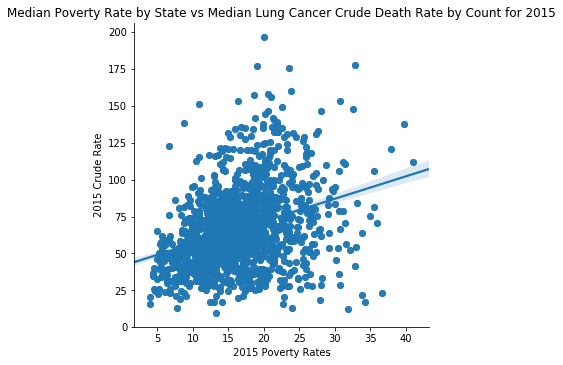

In [9]:
sns.lmplot(x='2015 Poverty Rates',y='2015 Crude Rate',data=deathPovertyRateCountyDF, fit_reg=True)
plt.savefig(os.path.join("Output", "povRatevsCrudeRate-County-Scatter.png"))
plt.title('Median Poverty Rate by State vs Median Lung Cancer Crude Death Rate by Count for 2015')